# Gelquant example usage

In [1]:
import gelquant

### Import and crop gel images as desired.

In [2]:
# The four numbers correspond to (x1, y1, x2, y2) points between which the gel gets cropped
# You can process more than one replicate by simply repeating gelquant.image_cropping
image1 = gelquant.image_cropping("data/gel-example.png", (30, 300, 205, 480))
image2 = gelquant.image_cropping("data/gel-example.png", (35, 800, 208, 950))
image3 = gelquant.image_cropping("data/gel-example.png", (390, 300, 565, 470))
image4 = gelquant.image_cropping("data/gel-example.png", (390, 800, 565, 950))

### Parse and set bounds on intensity plots, calculate areas

In [3]:
# The example dataset consists of 2 different proteins exposed to a protease
# for 0, 1, 2, 5, and 30 minutes.
# Provide the lane parser with the number of lanes and unique proteins per image - 
# in this example, 5 lanes and 1 protein.
data1, bounds1 = gelquant.lane_parser(image1, 5, 1)
data2, bounds2 = gelquant.lane_parser(image2, 5, 1)
data3, bounds3 = gelquant.lane_parser(image3, 5, 1)
data4, bounds4 = gelquant.lane_parser(image4, 5, 1)

In [4]:
# You can use the bounds from above as an initial guess,
# but you can also set your own peak boundaries (strongly encouraged).
# plot_output allows for visual inspection of selected boundaries.
# area_integrator captures the peak areas as a percentage of 
# the first band in each experiment for comparison. 
bounds1 = [75, 155]
bounds2 = [75, 145]
bounds3 = [70, 140]
bounds4 = [70, 140]

In [5]:
percentages1 = gelquant.area_integrator(data1, bounds1, 1)
percentages2 = gelquant.area_integrator(data2, bounds2, 1)
percentages3 = gelquant.area_integrator(data3, bounds3, 1)
percentages4 = gelquant.area_integrator(data4, bounds4, 1)

### Plot summary data

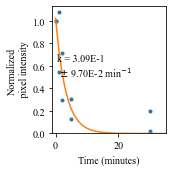

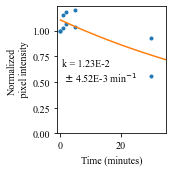

In [6]:
# for replicates, such as the two we have in the example images, you can define the dataset as follows:
a_data = [percentages1, percentages2]
b_data = [percentages3, percentages4]

# specify timepoints for summary plots
# specify output files - gets saved as .json files in current working directory
# You can read these back in and further analyze/plot (see next cell)
timepoints = [0,1,2,5,30]
a_output = "output/a_data.png"
b_output = "output/b_data.png"

# pipe the datasets and timepoints into summary plotter.
# Currently fits data with a single exponential decay function
a_popt, a_perr = gelquant.summary_data(a_data, timepoints=timepoints, fp=a_output)
b_popt, b_perr = gelquant.summary_data(b_data, timepoints=timepoints, fp=b_output)

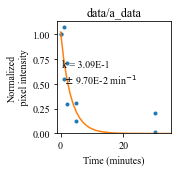

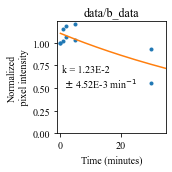

In [7]:
# read previously analyzed data back in for further analysis.
# useful when you have a lot of these datasets, as gel analysis code is kind of slow...

# import data, initialize empty lists to grab rates and errors from fits
data = ["data/a_data.json", "data/b_data.json"]
ks = []
errs = []

# re-fit data using summary data module

for i in range(len(data)):
    popt, perr = gelquant.summary_data(data[i], input_df=True, fp="output/data.png")
    ks.append(popt[1])
    errs.append(perr[1])

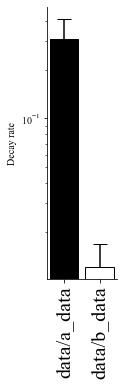

In [8]:
# plot data nicely using fancy_plotter
# image gets saved out with format of your choice (.svg, .png, etc)
colors = ["black"] + ["white"]

gelquant.fancy_plotter(data, ks, errs, colors, fp="output/data.png", ylabel="Decay rate")